Tugas Praktikum


Instruksi Umum:

Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

Mengimpor Library

In [11]:
# Import library dasar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import library machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


Mengimpor Dataset

In [12]:
# Membaca dataset
dataset = pd.read_csv(r'D:\File untuk kuliah\Semester-5\Pembelajaran Mesin\Praktek\MachineLearning_Smst5_2025\Week8_JS08\Assets\insurance.csv')

# Menampilkan 5 baris pertama
print("===== 5 Data Pertama =====")
print(dataset.head(), "\n")

# Menampilkan informasi dataset
print("===== Informasi Dataset =====")
print(dataset.info(), "\n")

# Statistik deskriptif
print("===== Statistik Deskriptif =====")
print(dataset.describe(), "\n")

# Mengecek missing value
print("===== Jumlah Missing Value =====")
print(dataset.isnull().sum())


===== 5 Data Pertama =====
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

===== Informasi Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 

===== Statistik Deskriptif ===

Visualisasi Awal Data

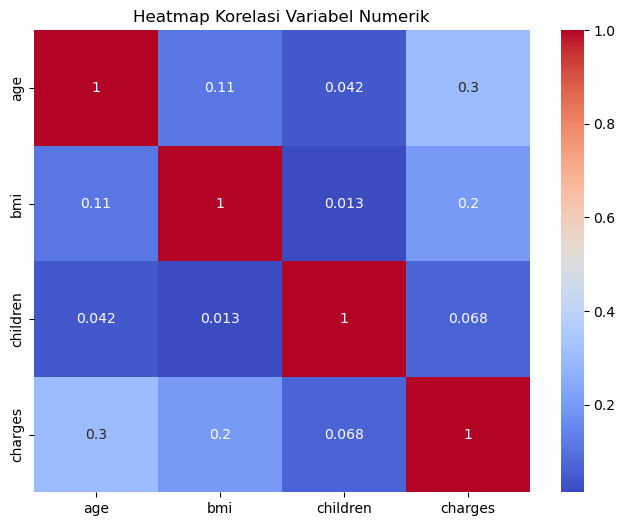

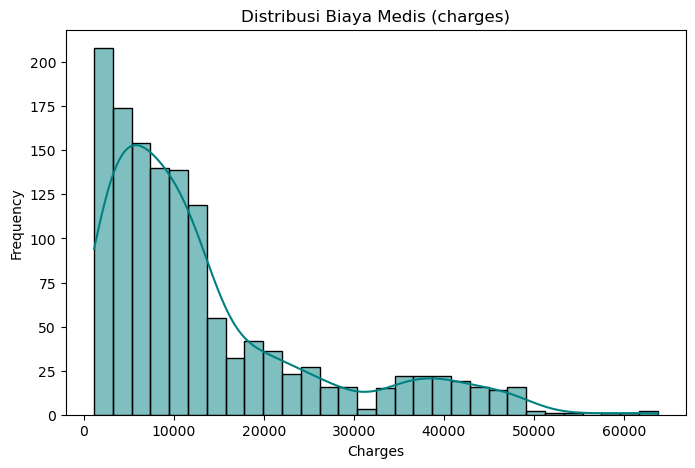

C:\Users\ASUS\AppData\Local\Temp\ipykernel_43104\3476016612.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=dataset, palette='Set2')


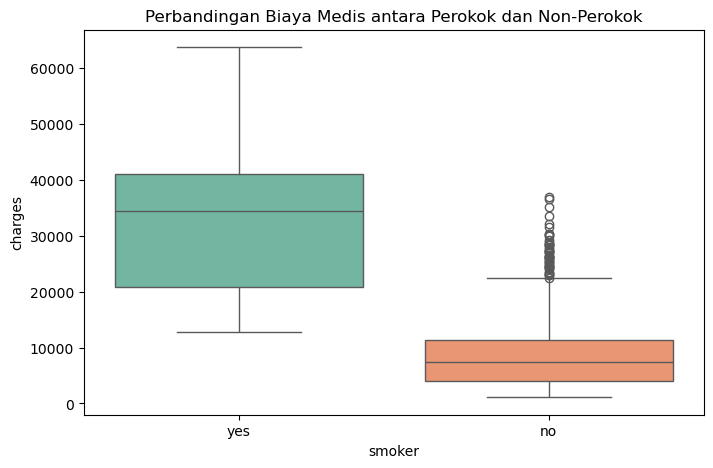

In [13]:
# Korelasi antar variabel numerik
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

# Distribusi biaya medis
plt.figure(figsize=(8,5))
sns.histplot(dataset['charges'], bins=30, kde=True, color='teal')
plt.title('Distribusi Biaya Medis (charges)')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Hubungan antara status perokok dan biaya medis
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data=dataset, palette='Set2')
plt.title('Perbandingan Biaya Medis antara Perokok dan Non-Perokok')
plt.show()


Menentukan Variabel Fitur (X) dan Target (y)

In [14]:
# Memisahkan fitur (variabel bebas) dan target
X = dataset.drop('charges', axis=1)
y = dataset['charges']


Encoding Variabel Kategorikal

In [15]:
# Kolom kategorikal
categorical_features = ['sex', 'smoker', 'region']

# Gunakan OneHotEncoder (drop='first' untuk menghindari dummy trap)
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), categorical_features)],
    remainder='passthrough'
)

X = np.array(ct.fit_transform(X))


Membagi Data Train dan Test

In [16]:
# 80% data latih, 20% data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Feature Scaling

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Membuat dan Melatih Model

In [18]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

Prediksi dan Evaluasi Model

In [19]:
# Prediksi data uji
y_pred = regressor.predict(X_test)

# Evaluasi model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("===== Hasil Evaluasi Model =====")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


===== Hasil Evaluasi Model =====
R-squared: 0.7836
Mean Squared Error: 33596915.85
Mean Absolute Error: 4181.19


Visualisasi Prediksi vs Aktual

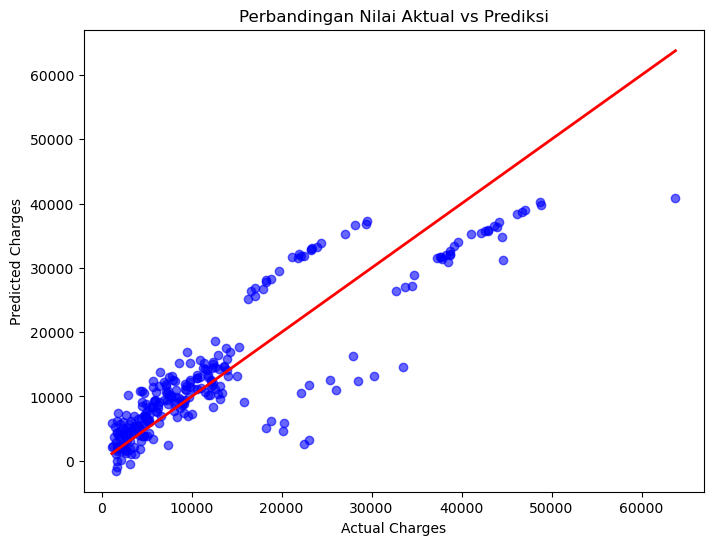

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Perbandingan Nilai Aktual vs Prediksi')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()


R² (R-squared) menunjukkan seberapa baik model menjelaskan variasi data.
Nilai mendekati 1 berarti model sangat baik.

MSE (Mean Squared Error) dan MAE (Mean Absolute Error) menunjukkan rata-rata kesalahan prediksi.
Semakin kecil nilainya, semakin akurat model.

Biasanya, fitur smoker dan bmi memiliki pengaruh kuat terhadap charges.
Jika R² cukup tinggi (>0.75), maka model regresi linear sudah baik.
Namun, jika rendah, kemungkinan hubungan antara variabel dan target bersifat non-linear